# Importing the required packages 

In [1]:
import numpy as np # To handle the numbers
import pandas as pd # To handle the dataset
import matplotlib.pyplot as plt # To plot the graph
import seaborn as sns
%matplotlib inline

# To ignore the warnings
import warnings  
warnings.filterwarnings('ignore')

# Loading the Training and Testing CSV file as pandas dataframe

In [2]:
train_ds = pd.read_csv("train_data.csv")
test_ds = pd.read_csv("test_data.csv")

In [3]:
# Reading the 6 rows of the train dataset
train_ds.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
# Reading the 6 rows of the test dataset
test_ds.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# To know the information of train_dataset
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
# To know the information of test_dataset
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
# shape of train dataset (rows,columns)
train_ds.shape

(54808, 14)

In [8]:
# shape of test dataset (rows,columns)
test_ds.shape

(23490, 13)

In [9]:
# Reading the target variable
target = train_ds["is_promoted"]


In [10]:
# Count of each catergory in "is_promoted" column

target.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# Explanation :
There are 14 columns including target variable in our train dataset and also we would able to see some of the missing values. Here "is_promoted" is our target variable and also we have 13 columns in our test dataset

In [11]:
# Dropping the 2 columns ("is_promoted","employee_id") from train dataset
train_ds.drop(columns=["is_promoted", "employee_id"], axis=0, inplace=True)

# Dropping the column("employee_id") from test dataset
test_ds.drop(columns=["employee_id"], axis=0, inplace=True)



In [12]:
# Summary of train dataset
train_ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [13]:
# summary of test dataset
test_ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [14]:
# To check the missing value in train dataset
print("TRAIN_DATASET\n")
train_ds.isna().sum()

TRAIN_DATASET



department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [15]:
#To check the missing value in test dataset
print("TEST_DATASET\n")
test_ds.isna().sum()

TEST_DATASET



department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# observation:
From above outcomes we able to understand that we have missing value in columns such as education and previous_year_rating.
1. Missing values in "education" is fill by "Bachelor's" since the count of Bachelor's is high compare to others.
2. In similar way, missing values in "previous_year_rating" is placed by "3.0" since the count of '3.0' is high compare to others.

In [16]:
data = train_ds.append(test_ds, ignore_index=True)

#count of values in "education"
print(data["education"].value_counts())

#count of values in "previous_year_rating"
print(data["previous_year_rating"].value_counts())



Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64


In [17]:
# handling the missing value in train dataset

train_ds["education"] = train_ds["education"].fillna("Bachelor's")
test_ds["education"] = test_ds["education"].fillna("Bachelor's")

# handling the missing value in test dataset

train_ds["previous_year_rating"] = train_ds["previous_year_rating"].fillna(3.0)
test_ds["previous_year_rating"] = test_ds["previous_year_rating"].fillna(3.0)

# Correlation between all the numerical variables are shown.
Heatmap is used to visualize the correlation that are shown through variations in coloring. The variable with dark color represent that the variable have more correlation.

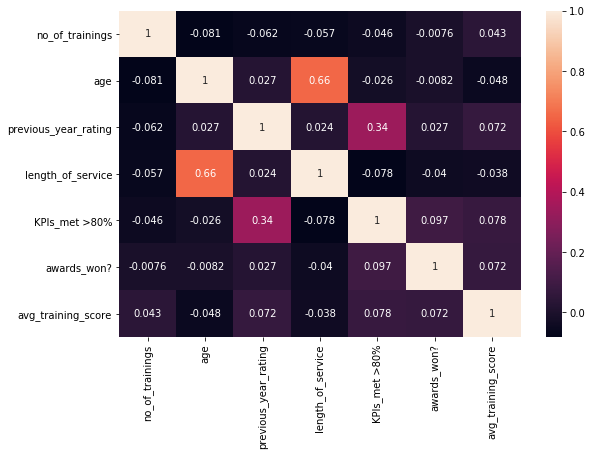

In [18]:
# plot of correlation matrix
plt.figure(figsize=(9,6))
sns.heatmap(train_ds.corr(),annot=True)

In [19]:
train_ds["no_of_trainings_promoted"] = train_ds["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
test_ds["no_of_trainings_promoted"] = test_ds["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
train_ds.head()
#creating the new columns "no_of_trainings_promoted" in both test and train dataset with condition.

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,1
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,1
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,1


In [20]:
train_ds["kpi_awards_trainingScore_promoted"] = train_ds["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
test_ds["kpi_awards_trainingScore_promoted"] = test_ds["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
train_ds.head()
#creating the new column "kpi_awards_trainingScore_promoted" for both train and test data with condition.

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1,1
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,1,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,1,1
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,1,1
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,1,1


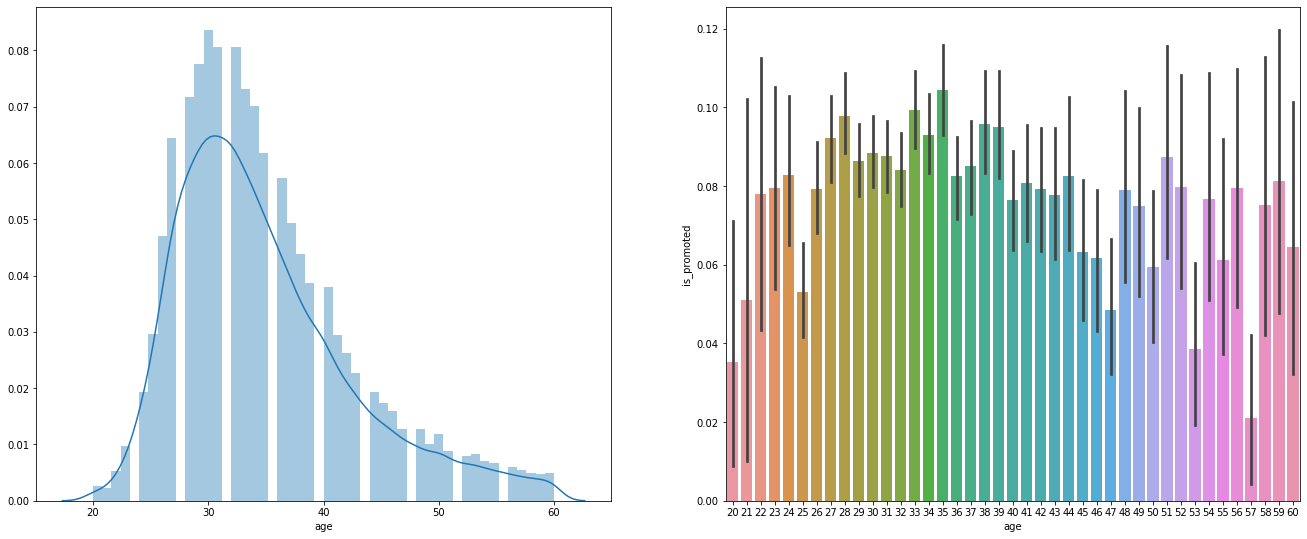

In [21]:
#Visualizing the plot on "age"
plt.figure(figsize=(35, 20))

# distplot of attribute "age"
plt.subplot(2, 3, 1)
sns.distplot(train_ds["age"])

# barplot of attributes "age" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["age"], target)


In [22]:
#creating the function call "age_range" to group it
def age_range(row):
    if row['age'] >= 20 and row['age'] <= 25:
        return '20-25'
    elif row['age']  >= 26 and row['age'] <= 30:
        return '26-30'
    elif row['age'] >= 31 and row['age'] <= 35:
        return '31-35'
    elif row['age'] >= 36 and row['age'] <= 40:
        return '36-40'
    elif row['age'] >= 41 and row['age'] <= 45:
        return '41-45'
    elif row['age'] >= 46 and row['age'] <= 50:
        return '46-50'
    elif row['age'] >= 51 and row['age'] <= 55:
        return '51-55'
    elif row['age'] >= 56 and row['age'] <= 60:
        return '56-60'
    
# creating a new column called "age_range" for both train and test data
train_ds['age_range'] = train_ds.apply(lambda row: age_range(row), axis=1)
test_ds['age_range'] = test_ds.apply(lambda row: age_range(row), axis=1)

train_ds.groupby(['age_range'])['age_range'].count()


age_range
20-25     3014
26-30    15104
31-35    16065
36-40     9963
41-45     5037
46-50     2773
51-55     1711
56-60     1141
Name: age_range, dtype: int64

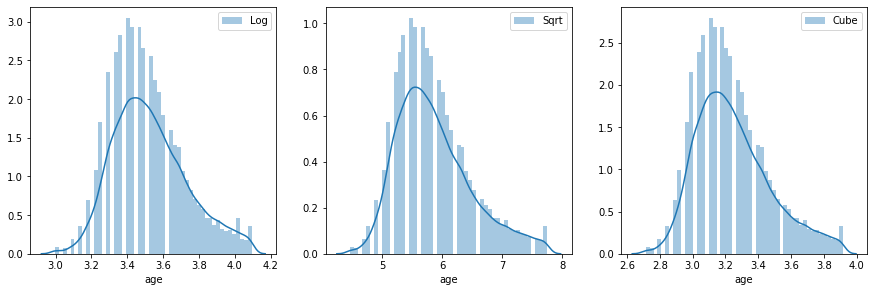

In [23]:
# created the new variable called log_age to store the value of log(age) for train data, similarly 
  #done for variable ("sqrt_age" and "cube_age")
log_age = np.log(train_ds["age"])
sqrt_age = np.power(train_ds["age"], 1/2)
cube_age = np.power(train_ds["age"], 1/3)

# Distplot for Log
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.distplot(log_age, label="Log")
# to adjust the position 
plt.legend(loc="best")

# distplot for sqrt
plt.subplot(2, 3, 2)
sns.distplot(sqrt_age, label="Sqrt")
plt.legend(loc="best")

# distplot for cube
plt.subplot(2, 3, 3)
sns.distplot(cube_age, label="Cube")
plt.legend(loc="best")

# creating a new column "age_log" to store the value of log(age) for both train and test data
train_ds["age_log"] = np.log(train_ds["age"])
test_ds["age_log"] = np.log(test_ds["age"])


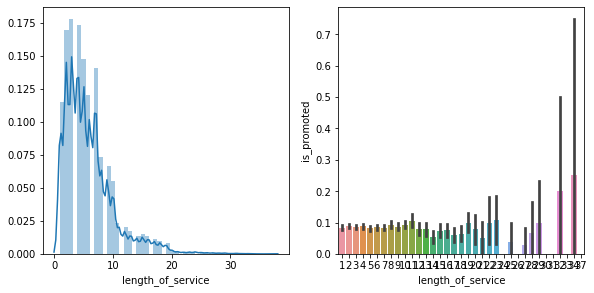

In [24]:
# visualizing the plot on "length_of_service"
plt.figure(figsize=(15, 10))

# distplot of "length_of_service"
plt.subplot(2, 3, 1)
sns.distplot(train_ds["length_of_service"])

#barplot of "Length_of_service" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["length_of_service"], target)

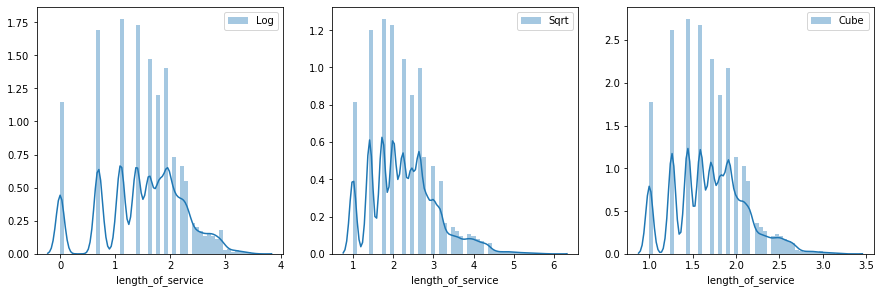

In [25]:
# created the new variable called log_ls to store the value of log(length_of_service) for train data, 
 #similarly done for variable ("sqrt_ls" and "cube_ls")
log_ls = np.log(train_ds["length_of_service"])
sqrt_ls = np.power(train_ds["length_of_service"], 1/2)
cube_ls = np.power(train_ds["length_of_service"], 1/3)

# distplot of log_ls
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.distplot(log_ls, label="Log")
plt.legend(loc="best")

# distplot of sqrt_ls
plt.subplot(2, 3, 2)
sns.distplot(sqrt_ls, label="Sqrt")
plt.legend(loc="best")

# distplot of cube_ls
plt.subplot(2, 3, 3)
sns.distplot(cube_ls,label="Cube")
plt.legend(loc="best")

# creating a new column "length_of_service_log" to store the value of log(length_of_service) for both train and test data
train_ds['length_of_service_log'] = np.log(train_ds['length_of_service'])
test_ds['length_of_service_log'] = np.log(test_ds['length_of_service'])


In [26]:
# creating a new column "age_service" in both test and train data 
# age_service = (age - length_of_service) / age

train_ds['age_service'] = (train_ds['age'] - train_ds['length_of_service'])/train_ds['age']
test_ds['age_service'] = (test_ds['age'] - test_ds['length_of_service'])/test_ds['age']

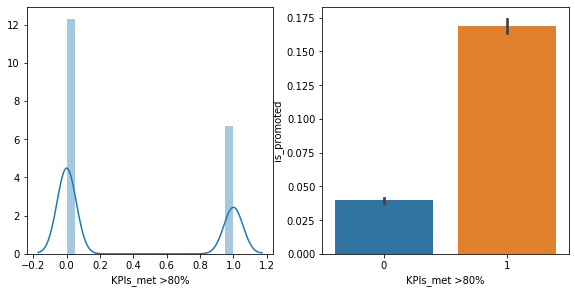

In [27]:
#Visualizing the plot on "KPIs_met > 80%"
plt.figure(figsize=(15, 10))

# distplot of "KPIs_met >80%"
plt.subplot(2, 3, 1)
sns.distplot(train_ds["KPIs_met >80%"])

# barplot of "KPIs_met >80%" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["KPIs_met >80%"], target)

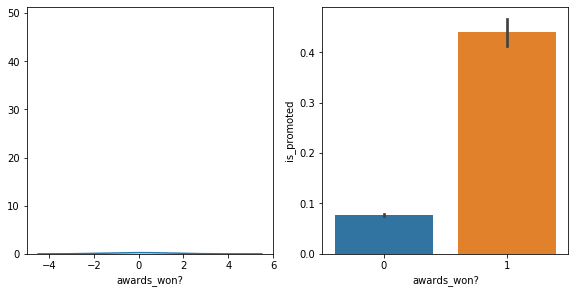

In [28]:
#Visualizing the plot on "awards_won"
plt.figure(figsize=(15, 10))

# distplot for "awards_won"
plt.subplot(2, 3, 1)
sns.distplot(train_ds["awards_won?"],kde_kws={'bw':1.5})

# barplot for "awards_won" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["awards_won?"], target)

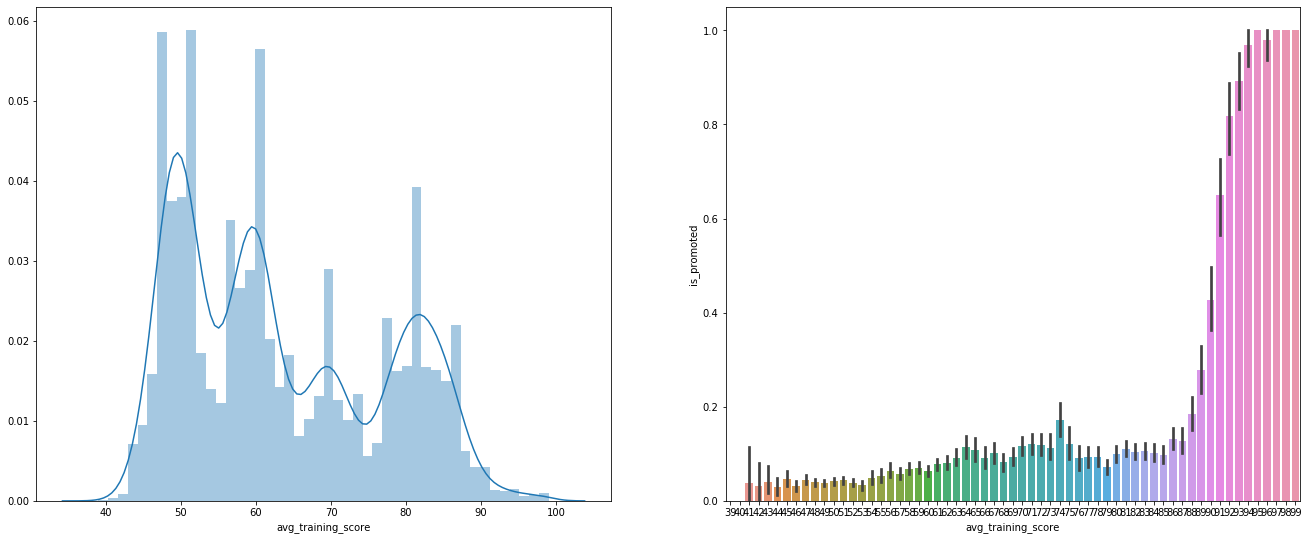

In [29]:
#Visualizing the plot on "avg_training_score"
plt.figure(figsize=(35, 20))

# distplot for "avg_training_score"
plt.subplot(2, 3, 1)
sns.distplot(train_ds["avg_training_score"])

# barplot for "avg_training_score" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["avg_training_score"], target)


In [30]:
# count of avg_training_score
train_ds["avg_training_score"].value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

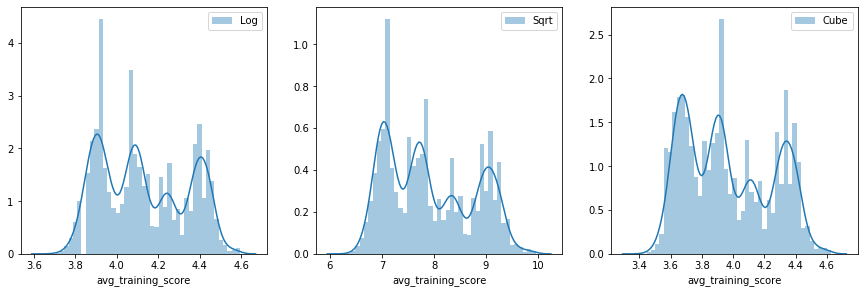

In [31]:
# created the new variable called log_ats to store the value of log(avg_training_score) for train data, 
 #similarly done for variable ("sqrt_ats" and "cube_ats")
log_ats = np.log(train_ds["avg_training_score"])
sqrt_ats = np.power(train_ds["avg_training_score"], 1/2)
cube_ats = np.power(train_ds["avg_training_score"], 1/3)

#distplot for log_ats
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.distplot(log_ats, label="Log")
plt.legend(loc="best")

#distplot for sqrt_ats
plt.subplot(2, 3, 2)
sns.distplot(sqrt_ats, label="Sqrt")
plt.legend(loc="best")

#distplot for cube_ats
plt.subplot(2, 3, 3)
sns.distplot(cube_ats, label="Cube")
plt.legend(loc="best")

# creating a new column "avg_training_score_log" to store the value of log(avg_training_score) for both train and test data
train_ds["avg_training_score_log"] = np.log(train_ds["avg_training_score"])
test_ds["avg_training_score_log"] = np.log(test_ds["avg_training_score"])

In [32]:
# creating a new column "avg_training_score_promoted" for both train and test data with condition (if(x>=90) then x=0).
train_ds["avg_training_score_promoted"] = train_ds["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)
test_ds["avg_training_score_promoted"] = test_ds["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)



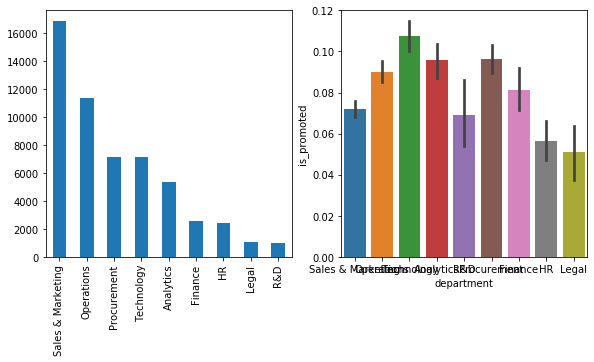

In [33]:
#Visualizing the plot on "department"
plt.figure(figsize=(15,10))

# bar plot of department
plt.subplot(2, 3, 1)
train_ds["department"].value_counts().plot(kind='bar')

# barplot of department compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["department"], target)

In [34]:
# count of department
train_ds["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

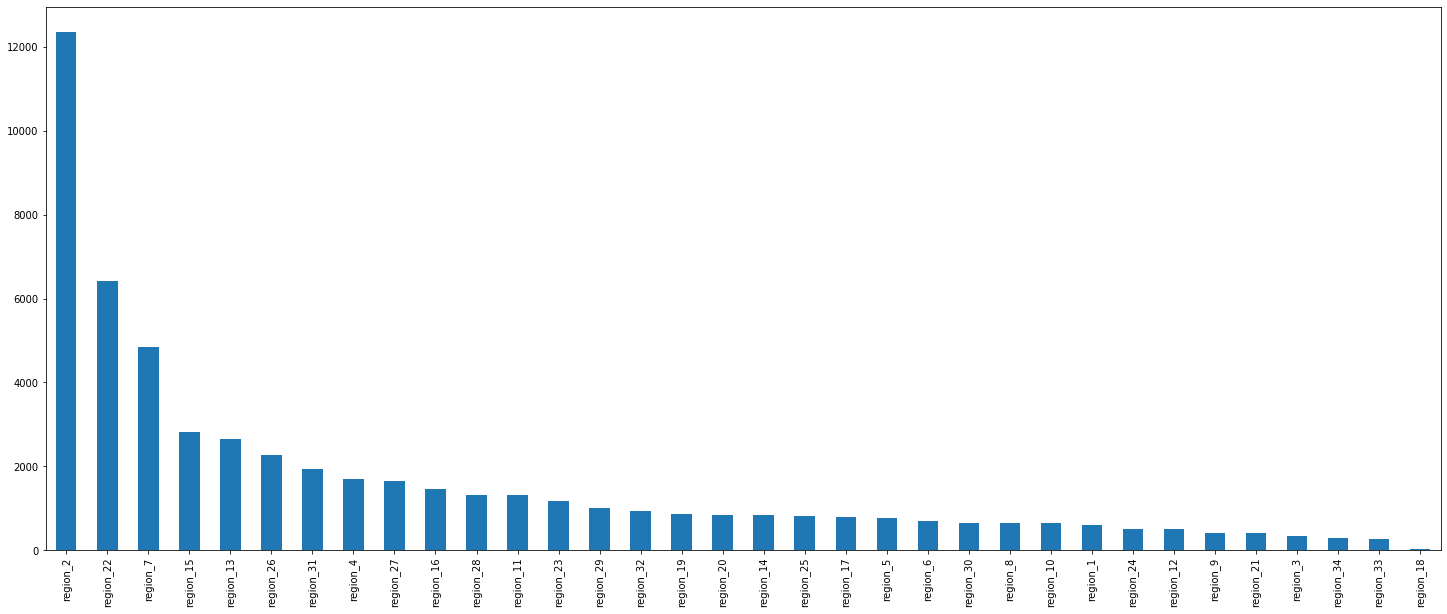

In [35]:
#Visualizing the plot on "region"
plt.figure(figsize=(25,10))

#barplot of "region"
train_ds["region"].value_counts().plot(kind='bar')



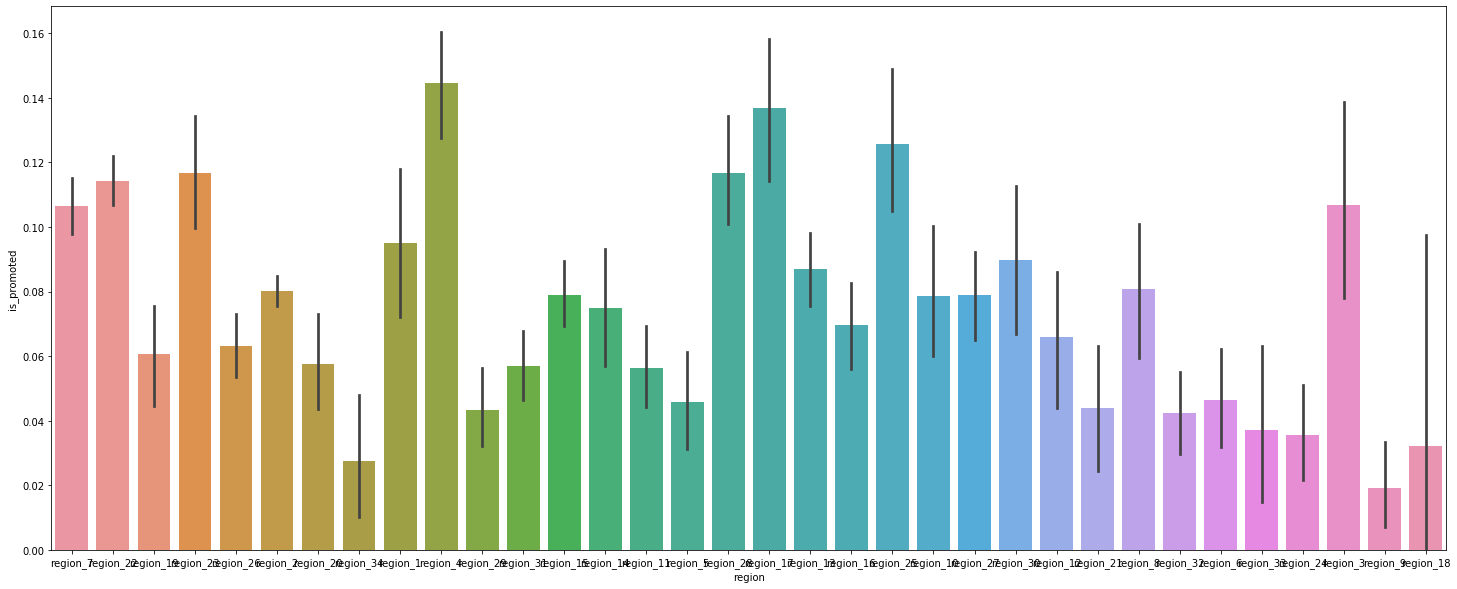

In [36]:
#barplot of "region" compare to target
plt.figure(figsize=(25,10))
sns.barplot(train_ds["region"], target)

In [37]:
# count of regions
train_ds["region"].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [38]:
# creating a new function called region to group it
def region_range(row):
    if row['region'] >= 1 and row['region'] <= 10:
        return '1to10'
    elif row['region'] >= 11 and row['region'] <= 20:
        return '11to20'
    elif row['region'] >= 21 and row['region'] <= 30:
        return '21to30'
    elif row['region'] >= 31 and row['region'] <= 40:
        return '31to40'
    
    
#converting the region's names to numbers 
train_ds['region']=train_ds['region'].str.split("_").str[1].astype('int64')
test_ds['region']=test_ds['region'].str.split("_").str[1].astype('int64')

train_ds['region'] = train_ds.apply(lambda row: region_range(row), axis=1)
test_ds['region'] = test_ds.apply(lambda row: region_range(row), axis=1)

train_ds.groupby(['region'])['region'].count()

region
11to20    12114
1to10     23024
21to30    16229
31to40     3441
Name: region, dtype: int64

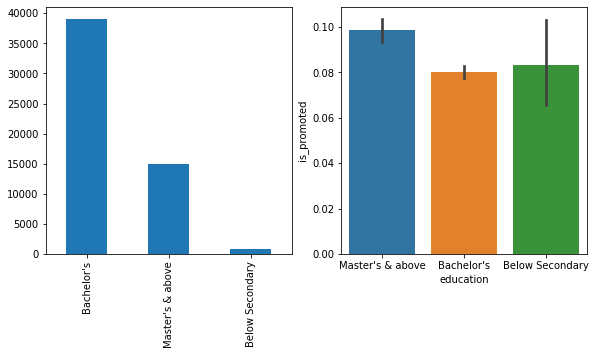

In [39]:
plt.figure(figsize=(15,10))

# barplot of "education"
plt.subplot(2, 3, 1)
train_ds["education"].value_counts().plot(kind='bar')

#barplot of "education" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["education"], target)

In [40]:
#count of education
train_ds["education"].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

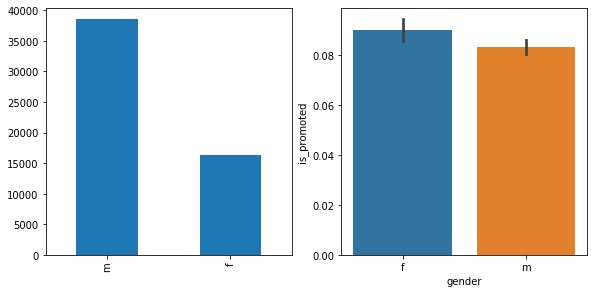

In [41]:
plt.figure(figsize=(15,10))

# barplot of gender
plt.subplot(2, 3, 1)
train_ds["gender"].value_counts().plot(kind='bar')

#barplot of gender compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["gender"], target)

In [42]:
# count of gender
train_ds["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

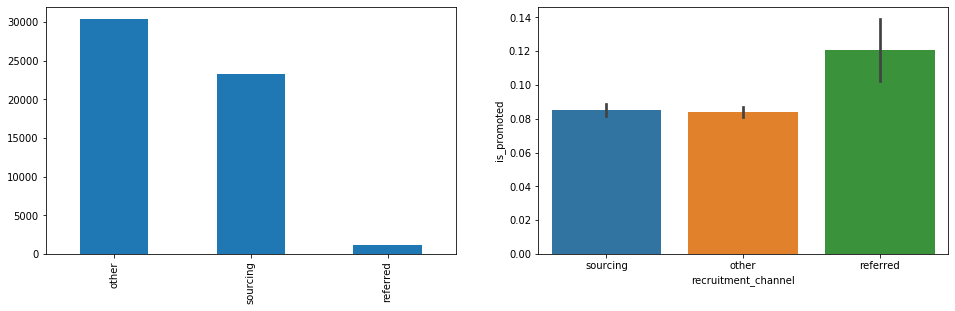

In [43]:
plt.figure(figsize=(25,10))

# barplot of "recuritment_channel"
plt.subplot(2, 3, 1)
train_ds["recruitment_channel"].value_counts().plot(kind='bar')

#barplot of "recuritment_channel" compare to target variable
plt.subplot(2, 3, 2)
sns.barplot(train_ds["recruitment_channel"], target)

In [44]:
#count of "recruitment_channel"
train_ds["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [45]:
train_ds.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted,age_range,age_log,length_of_service_log,age_service,avg_training_score_log,avg_training_score_promoted
0,Sales & Marketing,1to10,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1,1,31-35,3.555348,2.079442,0.771429,3.891820,0
1,Operations,21to30,Bachelor's,m,other,1,30,5.0,4,0,0,60,1,1,26-30,3.401197,1.386294,0.866667,4.094345,0
2,Sales & Marketing,11to20,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,1,1,31-35,3.526361,1.945910,0.794118,3.912023,0
3,Sales & Marketing,21to30,Bachelor's,m,other,2,39,1.0,10,0,0,50,1,1,36-40,3.663562,2.302585,0.743590,3.912023,0
4,Technology,21to30,Bachelor's,m,other,1,45,3.0,2,0,0,73,1,1,41-45,3.806662,0.693147,0.955556,4.290459,0


In [46]:
# dropping of column (age and length of service) in both train and test dataset

train_ds.drop(["age", "length_of_service"], axis=1, inplace=True)
test_ds.drop(["age", "length_of_service"], axis=1, inplace=True)

In [47]:
#converting 
train = pd.get_dummies(train_ds)
test = pd.get_dummies(test_ds)
#shape of updated train and test dataset
print(train.shape)
print(test.shape)

(54808, 41)
(23490, 41)


In [48]:
# reading a 6 rows of updated train dataset
train.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted,age_log,length_of_service_log,age_service,...,recruitment_channel_referred,recruitment_channel_sourcing,age_range_20-25,age_range_26-30,age_range_31-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60
0,1,5.0,1,0,49,1,1,3.555348,2.079442,0.771429,...,0,1,0,0,1,0,0,0,0,0
1,1,5.0,0,0,60,1,1,3.401197,1.386294,0.866667,...,0,0,0,1,0,0,0,0,0,0
2,1,3.0,0,0,50,1,1,3.526361,1.945910,0.794118,...,0,1,0,0,1,0,0,0,0,0
3,2,1.0,0,0,50,1,1,3.663562,2.302585,0.743590,...,0,0,0,0,0,1,0,0,0,0
4,1,3.0,0,0,73,1,1,3.806662,0.693147,0.955556,...,0,0,0,0,0,0,1,0,0,0


In [49]:
# reading a 6 rows of updated test dataset
test.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted,age_log,length_of_service_log,age_service,...,recruitment_channel_referred,recruitment_channel_sourcing,age_range_20-25,age_range_26-30,age_range_31-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60
0,1,3.0,1,0,77,1,1,3.178054,0.000000,0.958333,...,0,1,1,0,0,0,0,0,0,0
1,1,3.0,0,0,51,1,1,3.433987,1.609438,0.838710,...,0,0,0,0,1,0,0,0,0,0
2,1,1.0,0,0,47,1,1,3.433987,1.386294,0.870968,...,0,0,0,0,1,0,0,0,0,0
3,3,2.0,0,0,65,1,1,3.433987,2.197225,0.709677,...,0,0,0,0,1,0,0,0,0,0
4,1,4.0,0,0,61,1,1,3.401197,1.945910,0.766667,...,0,1,0,1,0,0,0,0,0,0


#Data Splitting

We are going to use train_test_split of sklearn to split the data.
training-data - 70.00%
test-data - 30.00%

In [50]:
#splitting of train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

## Traning the Model
Here we have been used following classifier to train the model:
 1. Logistic Regression
 2. Decision Tree(Before Pruning)
 3. Decision Tree(After Pruning)
 4. Random Forest
 5. K-Nearest Neighbors
 6. Support Vector Machine
 
Boosting in Machine Learning

 7. AdaBoost
 8. Gradient Boost
 9. XGBoost


# Logistic Regression
Logistic regression is a supervised learning classification algorithm through which we can predict the probability of a target variable.

In [51]:

#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000) 
logmodel.fit(x_train, y_train)

lr_pred = logmodel.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score


print("Accuracy =",accuracy_score(y_test,lr_pred))
print('\n')
print("Classification_Report = ",classification_report(y_test, lr_pred))
print('\n')
print("Confusion_Matrix = ",confusion_matrix(y_test, lr_pred))




Accuracy = 0.9349875326886821


Classification_Report =                precision    recall  f1-score   support

           0       0.94      0.99      0.97     15110
           1       0.81      0.26      0.39      1333

    accuracy                           0.93     16443
   macro avg       0.88      0.63      0.68     16443
weighted avg       0.93      0.93      0.92     16443



Confusion_Matrix =  [[15031    79]
 [  990   343]]


# Decision tree
It is a tree-like structure which is used to get all possible solution for given model based on some given criteria.


In [52]:
# DECISION TREE CLASSIFICATION ( before pruning)

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=100)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score

print("Accuracy = ",accuracy_score(y_test,dt_pred))
print('\n')
print("Classification_Report = ",classification_report(y_test, dt_pred))
print('\n')
print("Confusion_Matrix = ",confusion_matrix(y_test, dt_pred))

Accuracy =  0.8983153925682661


Classification_Report =                precision    recall  f1-score   support

           0       0.95      0.94      0.94     15110
           1       0.39      0.46      0.42      1333

    accuracy                           0.90     16443
   macro avg       0.67      0.70      0.68     16443
weighted avg       0.91      0.90      0.90     16443



Confusion_Matrix =  [[14164   946]
 [  726   607]]


# Pruning
Pruning is the one which have been used to increase the accuracy of decision tree

In [53]:
# Pruning 

dt_model1 = DecisionTreeClassifier(criterion = 'entropy',splitter='random',max_leaf_nodes=10,min_samples_leaf=1,min_samples_split=10,random_state=100,max_depth=3)
dt_model1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='random')

In [54]:
#Decision tree ( after Pruning)

dt_pred1 = dt_model1.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,dt_pred1))
print('\n')
print("Classification_Report = ",classification_report(y_test, dt_pred1))
print('\n')
print("Confusion_Matrix = ",confusion_matrix(y_test, dt_pred1))


Accuracy =  0.9272030651340997


Classification_Report =                precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.96      0.11      0.19      1333

    accuracy                           0.93     16443
   macro avg       0.94      0.55      0.58     16443
weighted avg       0.93      0.93      0.90     16443



Confusion_Matrix =  [[15104     6]
 [ 1191   142]]


# Random Forest classification
Random Forest construct an tree similar to decision tree for an given model through which it will predict the each and every data and finally select the best solution by means of voting.

In [55]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200,criterion = 'gini',max_features='auto',random_state=100,max_depth=50)
rf_model.fit(x_train,y_train)
r_pred = rf_model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print("Accuracy = ",accuracy_score(y_test,r_pred))
print('\n')
print("Classification_Report = ",classification_report(y_test, r_pred))
print('\n')
print("Confusion_Matrix = ",confusion_matrix(y_test, r_pred))

Accuracy =  0.9402785379796874


Classification_Report =                precision    recall  f1-score   support

           0       0.94      0.99      0.97     15110
           1       0.84      0.33      0.47      1333

    accuracy                           0.94     16443
   macro avg       0.89      0.66      0.72     16443
weighted avg       0.93      0.94      0.93     16443



Confusion_Matrix =  [[15024    86]
 [  896   437]]


# K Nearest Neighbor
K-Nearest Neighbors is one of the simplest algorithms used in Machine Learning. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.

In [56]:
# K NEAREST NEIGHBOR


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10,algorithm='auto',leaf_size=2 ,metric='minkowski',
            metric_params=None, n_jobs=1,  p=1,weights='uniform')
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

print('Accuracy = ',accuracy_score(y_test,knn_pred))
print('\n')
print("Classification_Report",classification_report(y_test, knn_pred))
print('\n')
print("Confusion_Matrix",confusion_matrix(y_test, knn_pred))

Accuracy =  0.9312777473697014


Classification_Report               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.97      0.16      0.27      1333

    accuracy                           0.93     16443
   macro avg       0.95      0.58      0.62     16443
weighted avg       0.93      0.93      0.91     16443



Confusion_Matrix [[15104     6]
 [ 1124   209]]


# AdaBoost
AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”.

In [57]:
#AdaBoost

from sklearn.ensemble import AdaBoostClassifier
Adaboost = AdaBoostClassifier(n_estimators=50,random_state=100)
Adaboost.fit(x_train,y_train)
ab_pred = Adaboost.predict (x_test)


print('Accuracy = ',accuracy_score(y_test,ab_pred))
print('\n')
print("Classification_Report",classification_report(y_test, ab_pred))
print('\n')
print("Confusion_Matrix",confusion_matrix(y_test, ab_pred))

Accuracy =  0.9281761235784224


Classification_Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96     15110
           1       0.73      0.18      0.29      1333

    accuracy                           0.93     16443
   macro avg       0.83      0.59      0.63     16443
weighted avg       0.92      0.93      0.91     16443



Confusion_Matrix [[15023    87]
 [ 1094   239]]


# Gradient boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [58]:
#Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb_model.fit(x_train, y_train)
g_pred = gb_model.predict(x_test)

print('Accuracy = ', accuracy_score(y_test,g_pred))
print('\n')
print("Classification_Report = ",classification_report(y_test, g_pred))
print('\n')
print("Confusion_Matrix = ",confusion_matrix(y_test,g_pred))

Accuracy =  0.9275679620507207


Classification_Report =                precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.82      0.14      0.23      1333

    accuracy                           0.93     16443
   macro avg       0.88      0.57      0.60     16443
weighted avg       0.92      0.93      0.90     16443



Confusion_Matrix =  [[15071    39]
 [ 1152   181]]


# XGBoost
XGBoost stands for “Extreme Gradient Boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 

In [59]:
# XGBoost

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
import  xgboost as xgb
xg_model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
xg_model.fit(x_train, y_train)
xg_pred = xg_model.predict(x_test)

print('Accuracy = ', accuracy_score(y_test,xg_pred))
print('\n')
print("Classification_Report",classification_report(y_test, xg_pred))
print('\n')
print("Confusion_Matrix",confusion_matrix(y_test, xg_pred))

Accuracy =  0.9452654625068418


Classification_Report               precision    recall  f1-score   support

           0       0.95      1.00      0.97     15110
           1       0.95      0.34      0.50      1333

    accuracy                           0.95     16443
   macro avg       0.95      0.67      0.74     16443
weighted avg       0.95      0.95      0.93     16443



Confusion_Matrix [[15084    26]
 [  874   459]]


# Support Vector Machine
SVM is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane 

In [60]:
# Support Vector Machine

from sklearn.svm import SVC
SVM_model = SVC(kernel='linear')

SVM_model.fit(x_train,y_train)

svm_pred = SVM_model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


print('Accuracy = ',accuracy_score(y_test,svm_pred))
print('\n')
print("Classification_Report",classification_report(y_test, svm_pred))
print('\n')
print("Confusion_Matrix",confusion_matrix(y_test, svm_pred))

Accuracy =  0.9284802043422733


Classification_Report               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.80      0.16      0.26      1333

    accuracy                           0.93     16443
   macro avg       0.87      0.58      0.61     16443
weighted avg       0.92      0.93      0.91     16443



Confusion_Matrix [[15058    52]
 [ 1124   209]]


# Comparing and Visualizing the results of all classifiers

In [61]:

print ( "Accuracy_Score ")
print('\n')


# Building the two lists for visualization 
classifiers = ['LR','DT1','DT2',
         'RF','KNN','AB',
         'GB','XG','SVM'] 
scores = [accuracy_score(y_test,lr_pred),accuracy_score(y_test,dt_pred),accuracy_score(y_test,dt_pred1),
         accuracy_score(y_test,r_pred),accuracy_score(y_test,knn_pred),
         accuracy_score(y_test,ab_pred),accuracy_score(y_test,g_pred),
         accuracy_score(y_test,xg_pred),accuracy_score(y_test,svm_pred)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping["Logistic Regreesion"] =accuracy_score(y_test,lr_pred) 
mapping["Decision Tree(Before Pruning)"] = accuracy_score(y_test,dt_pred)
mapping["Decision Tree(after Pruning)"] = accuracy_score(y_test,dt_pred1)
mapping["Random Forest"] = accuracy_score(y_test,r_pred)
mapping["K-Nearest Neighbors"] = accuracy_score(y_test,knn_pred)
mapping["AdaBoost"] = accuracy_score(y_test,ab_pred)
mapping["Gradient Boost"] = accuracy_score(y_test,g_pred)
mapping["XGBoost"] = accuracy_score(y_test,xg_pred)
mapping["Support Vector Machine"] = accuracy_score(y_test,svm_pred)
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

Accuracy_Score 


Logistic Regreesion : 0.9349875326886821
Decision Tree(Before Pruning) : 0.8983153925682661
Decision Tree(after Pruning) : 0.9272030651340997
Random Forest : 0.9402785379796874
K-Nearest Neighbors : 0.9312777473697014
AdaBoost : 0.9281761235784224
Gradient Boost : 0.9275679620507207
XGBoost : 0.9452654625068418
Support Vector Machine : 0.9284802043422733


 # Plotting the results
 barplot are plotted for the following classifiers 
1. Logistic Regression are expressed as	        (LR)
2. Decision Tree(Before Pruning) are expressed as		(DT1)
3. Decision Tree(After Pruning)	are expressed as	    (DT2)
4. Random Forest	are expressed as		            (RF)
5. K-Nearest Neighbors	are expressed as		        (KNN)
6. AdaBoost	are expressed as			                (AB)
7. Gradient Boost	are expressed as		            (GB)
8. XGBoost	are expressed as			                (XG)
9. Support Vector Machine	are expressed as	        (SVM)

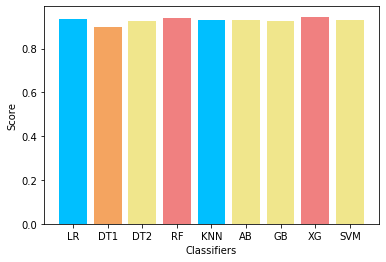

In [62]:
plt.bar(classifiers, scores,color=['deepskyblue','sandybrown','khaki','lightcoral',
                                   'deepskyblue','khaki','khaki',
                                   'lightcoral', 'khaki']) 
plt.ylabel('Score') 
plt.xlabel('Classifiers') 
plt.show()

# Analysis of the dataset
0.94027 and 0.94526 are the accuracy of Random Forest and XGBoost respectively.
From the barplot we would able to find the following
1. color "lightcoral" represents that we have high accuracy on both Random Forest and XGBoost and its about 94%.
2. color "deepskyblue" represents the accuracy of Logistic_Regression and K-nearest neighbors, its about 93%.
3. Color "sandybrown" represents the accuracy of Decision tree before Pruning and it is about 89% accuracy.
4. color "khaki" represents that we have the accuracy about 92% for decision tree after pruning,AdaBoost, Gradient Boost and Support Vector Machine.



# Testing the `Test.csv`
XGBoost is the best algorithm with 94% and it is used to predict the value.

In [63]:

y_pred = xg_model.predict(test).astype(int)

In [64]:
print(y_pred)


[0 0 0 ... 0 0 1]


In [65]:
test['is_promoted']=y_pred


In [66]:
test.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted,age_log,length_of_service_log,age_service,...,recruitment_channel_sourcing,age_range_20-25,age_range_26-30,age_range_31-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60,is_promoted
0,1,3.0,1,0,77,1,1,3.178054,0.000000,0.958333,...,1,1,0,0,0,0,0,0,0,0
1,1,3.0,0,0,51,1,1,3.433987,1.609438,0.838710,...,0,0,0,1,0,0,0,0,0,0
2,1,1.0,0,0,47,1,1,3.433987,1.386294,0.870968,...,0,0,0,1,0,0,0,0,0,0
3,3,2.0,0,0,65,1,1,3.433987,2.197225,0.709677,...,0,0,0,1,0,0,0,0,0,0
4,1,4.0,0,0,61,1,1,3.401197,1.945910,0.766667,...,1,0,1,0,0,0,0,0,0,0


In [67]:
test.tail()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,kpi_awards_trainingScore_promoted,age_log,length_of_service_log,age_service,...,recruitment_channel_sourcing,age_range_20-25,age_range_26-30,age_range_31-35,age_range_36-40,age_range_41-45,age_range_46-50,age_range_51-55,age_range_56-60,is_promoted
23485,1,3.0,0,0,61,1,1,3.178054,0.000000,0.958333,...,1,1,0,0,0,0,0,0,0,0
23486,1,3.0,0,0,74,1,1,3.433987,1.945910,0.774194,...,1,0,0,1,0,0,0,0,0,0
23487,1,4.0,0,0,50,1,1,3.258097,1.386294,0.846154,...,1,0,1,0,0,0,0,0,0,0
23488,3,3.0,0,0,70,1,1,3.295837,0.000000,0.962963,...,1,0,1,0,0,0,0,0,0,0
23489,3,5.0,1,0,89,1,1,3.688879,1.609438,0.875000,...,0,0,0,0,1,0,0,0,0,1
